<a href="https://colab.research.google.com/github/Methun18/oibsip_taskno/blob/main/Sentiment_Analysis4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Loading and Preprocessing the Data

In [ ]:
df=pd.read_csv("/content/Twitter_Data.csv")
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [ ]:
df.isnull().sum()

,0
clean_text,4
category,7


In [ ]:
df = df.dropna()

In [ ]:
df['clean_text'] = df['clean_text'].str.lower().str.replace('[^\w\s]', '', regex=True)

In [ ]:
df.head()

,clean_text,category
0,when modi promised minimum government maximum ...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


# 3. Splitting the Data

In [ ]:
X = df['clean_text']
y = df['category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Feature Extraction (TF-IDF)

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# 5. Model Training (Naive Bayes Classifier)

In [ ]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)


# 6. Model Evaluation

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))


Accuracy: 73.67%
              precision    recall  f1-score   support

        -1.0       0.91      0.42      0.57      7152
         0.0       0.88      0.66      0.76     11067
         1.0       0.65      0.95      0.77     14375

    accuracy                           0.74     32594
   macro avg       0.81      0.68      0.70     32594
weighted avg       0.79      0.74      0.72     32594



# 7. Data Visualization (Optional)

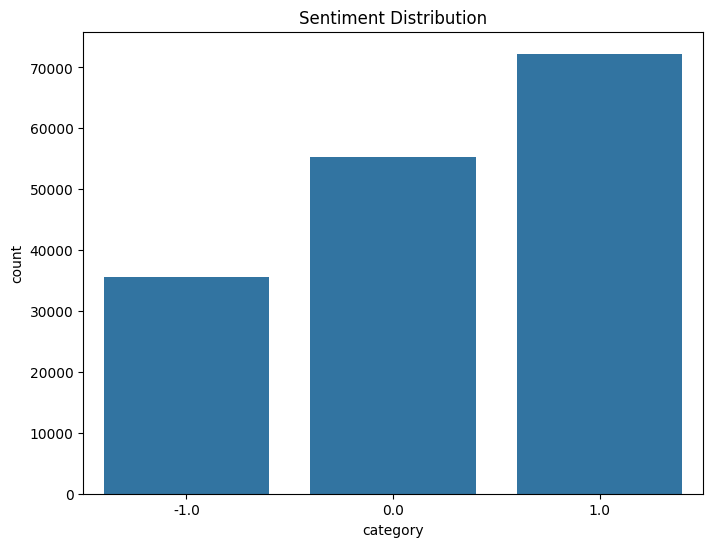

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=df)
plt.title('Sentiment Distribution')
plt.show()

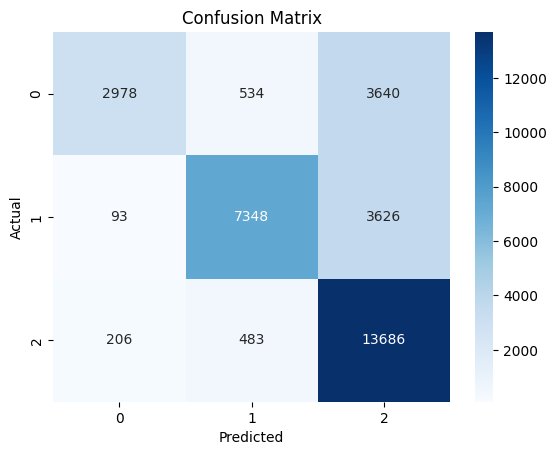

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


<ipython-input-23-f3b9e78009d1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=df, palette='coolwarm')


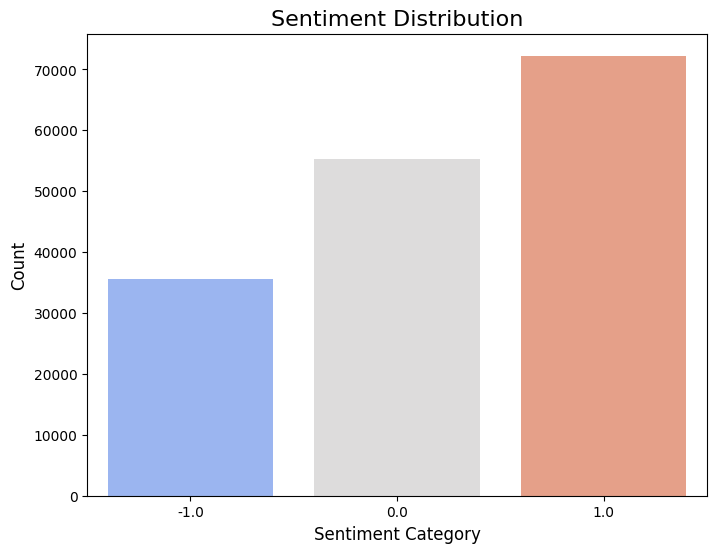

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=df, palette='coolwarm')
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


<ipython-input-25-0a396968d6b3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette='coolwarm')


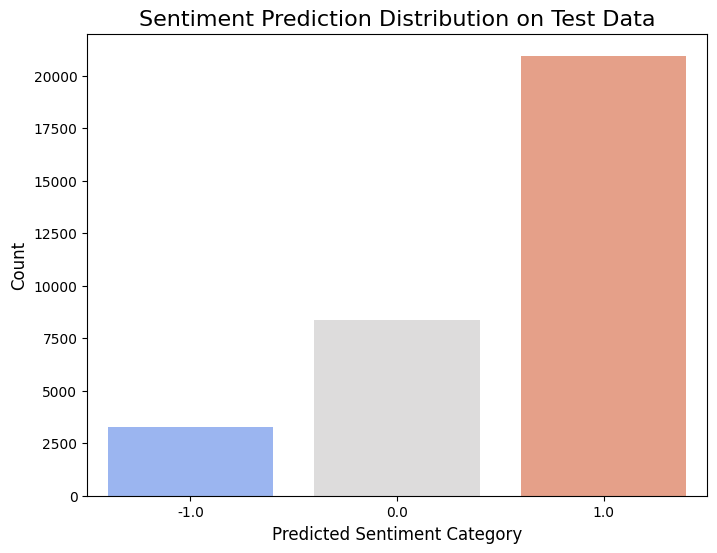

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(x=y_pred, palette='coolwarm')
plt.title('Sentiment Prediction Distribution on Test Data', fontsize=16)
plt.xlabel('Predicted Sentiment Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()
